In [1]:
import pandas as pd


df = pd.read_csv('Extended_Employee_Performance_and_Productivity_Data.csv')


missing_values = df.isnull().sum()


total_missing = missing_values.sum()


print("Missing Values:")
print(missing_values)
print("\nTotal Missing Values:", total_missing)



Missing Values:
Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

Total Missing Values: 0


In [2]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

negative_values = (df[numeric_columns] < 0).sum()

negative_values = negative_values[negative_values > 0]


if negative_values.empty:
    print("no negative values found in numeric columns.")
else:
    print("Negative Values:")
    # Display the columns with negative values
    print("Columns with negative values:")
    print(negative_values)





no negative values found in numeric columns.


In [5]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [6]:
print(df.dtypes)

Employee_ID                      int64
Department                      object
Gender                          object
Age                              int64
Job_Title                       object
Hire_Date                       object
Years_At_Company                 int64
Education_Level                 object
Performance_Score                int64
Monthly_Salary                 float64
Work_Hours_Per_Week              int64
Projects_Handled                 int64
Overtime_Hours                   int64
Sick_Days                        int64
Remote_Work_Frequency            int64
Team_Size                        int64
Training_Hours                   int64
Promotions                       int64
Employee_Satisfaction_Score    float64
Resigned                          bool
dtype: object


In [7]:
df['Hire_Date'] = pd.to_datetime(df['Hire_Date'], errors='coerce')


In [9]:
invalid_age = df[(df['Age'] < 16) | (df['Age'] > 70)]
print(f"Invalid Ages:\n{invalid_age[['Employee_ID', 'Age']]}")


Invalid Ages:
Empty DataFrame
Columns: [Employee_ID, Age]
Index: []


In [10]:
invalid_salary = df[df['Monthly_Salary'] < 0]
print(f"\nSubzero Salaries:\n{invalid_salary[['Employee_ID', 'Monthly_Salary']]}")



Subzero Salaries:
Empty DataFrame
Columns: [Employee_ID, Monthly_Salary]
Index: []


In [11]:
from datetime import datetime
today = datetime.today()

future_hires = df[df['Hire_Date'] > today]
print(f"\nEmployees hired in the future:\n{future_hires[['Employee_ID', 'Hire_Date']]}")

old_hires = df[df['Hire_Date'] < '1950-01-01']
print(f"\nEmployees hired before 1950:\n{old_hires[['Employee_ID', 'Hire_Date']]}")



Employees hired in the future:
Empty DataFrame
Columns: [Employee_ID, Hire_Date]
Index: []

Employees hired before 1950:
Empty DataFrame
Columns: [Employee_ID, Hire_Date]
Index: []


In [12]:
df['Age_At_Hire'] = df['Age'] - df['Years_At_Company']
too_young_hires = df[df['Age_At_Hire'] < 16]
print(f"\nEmployees hired too young:\n{too_young_hires[['Employee_ID', 'Age', 'Years_At_Company', 'Age_At_Hire']]}")



Employees hired too young:
       Employee_ID  Age  Years_At_Company  Age_At_Hire
19              20   23                 9           14
171            172   22                 9           13
293            294   22                 8           14
298            299   22                 7           15
318            319   22                 8           14
...            ...  ...               ...          ...
99822        99823   22                 7           15
99875        99876   22                 7           15
99912        99913   22                 9           13
99927        99928   23                 9           14
99998        99999   22                 9           13

[1503 rows x 4 columns]


In [14]:


print("\n (Gender):")
print(df['Gender'].unique())

print("\n(Education_Level):")
print(df['Education_Level'].unique())

print("\n (Department):")
print(df['Department'].unique())



 (Gender):
['Male' 'Female' 'Other']

(Education_Level):
['High School' 'Bachelor' 'Master' 'PhD']

 (Department):
['IT' 'Finance' 'Customer Support' 'Engineering' 'Marketing' 'HR'
 'Operations' 'Sales' 'Legal']


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

resigned_rate = df['Resigned'].mean() * 100
print(f"\nProportion of employees who resigned: {resigned_rate:.2f}%")


Proportion of employees who resigned: 10.01%


In [18]:
resigned_by_gender = df.groupby('Gender')['Resigned'].mean() * 100
print("\nProportion of employees who resigned by gender:")
print(resigned_by_gender)


Proportion of employees who resigned by gender:
Gender
Female    10.033124
Male      10.008120
Other      9.753024
Name: Resigned, dtype: float64


In [19]:
resigned_by_department = df.groupby('Department')['Resigned'].mean().sort_values(ascending=False) * 100
print("\nProportion of employees who resigned by department:")
print(resigned_by_department)


Proportion of employees who resigned by department:
Department
Finance             10.535714
HR                  10.264599
Legal               10.217665
Marketing           10.030314
Operations          10.025937
Sales                9.926272
Customer Support     9.877654
Engineering          9.647682
IT                   9.558890
Name: Resigned, dtype: float64


In [20]:
features_to_compare = ['Age', 'Monthly_Salary', 'Projects_Handled', 'Overtime_Hours', 'Employee_Satisfaction_Score', 'Work_Hours_Per_Week']

In [21]:
mean_comparison = df.groupby('Resigned')[features_to_compare].mean()
print("\nAverage values ​​of characteristics for those who quit and those who stayed::")
print(mean_comparison)


Average values ​​of characteristics for those who quit and those who stayed::
                Age  Monthly_Salary  Projects_Handled  Overtime_Hours  \
Resigned                                                                
False     41.016213     6403.908768         24.439438       14.508045   
True      41.148052     6396.938062         24.356843       14.576823   

          Employee_Satisfaction_Score  Work_Hours_Per_Week  
Resigned                                                    
False                        3.000174            44.956517  
True                         2.989325            44.960839  


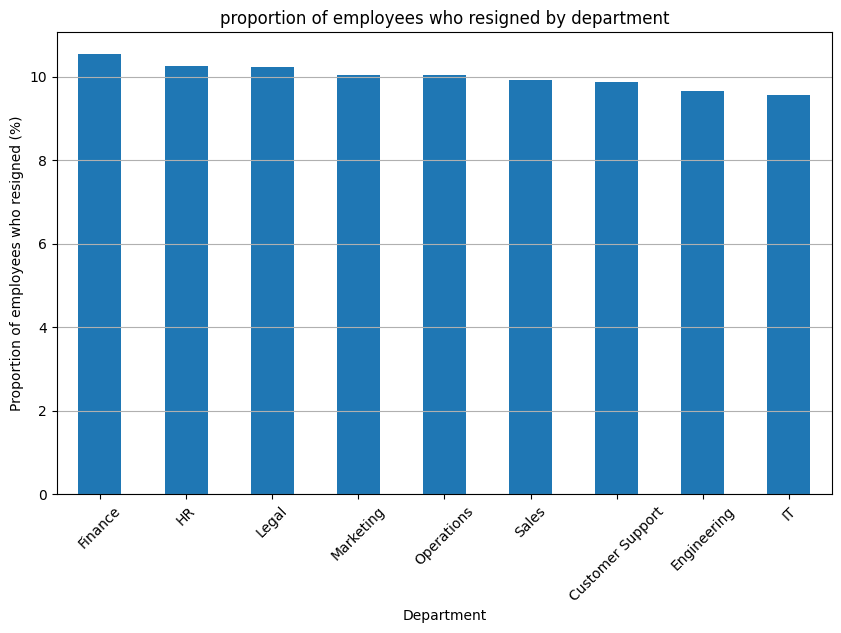

In [22]:
plt.figure(figsize=(10,6))
resigned_by_department.plot(kind='bar')
plt.title('proportion of employees who resigned by department')
plt.ylabel('Proportion of employees who resigned (%)')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


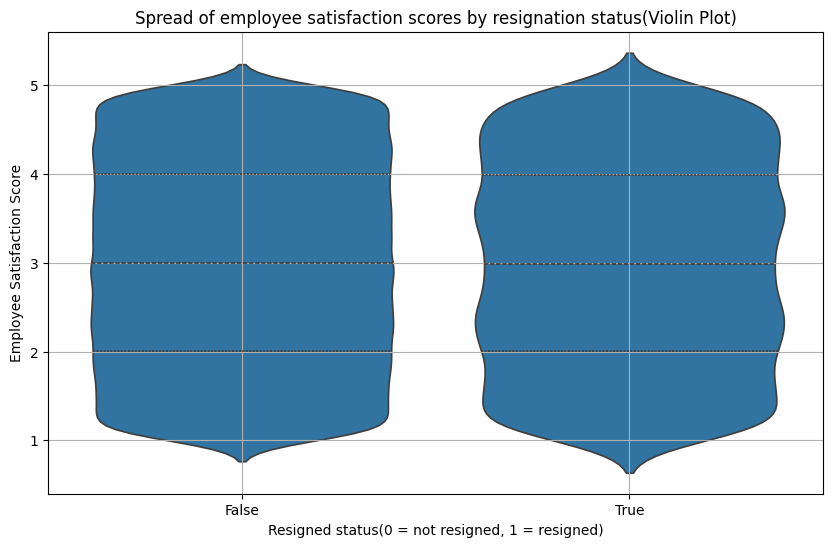

In [27]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Resigned', y='Employee_Satisfaction_Score', inner="quartile")
plt.title('Spread of employee satisfaction scores by resignation status(Violin Plot)')
plt.xlabel('Resigned status(0 = not resigned, 1 = resigned)')
plt.ylabel('Employee Satisfaction Score')
plt.grid(True)
plt.show()




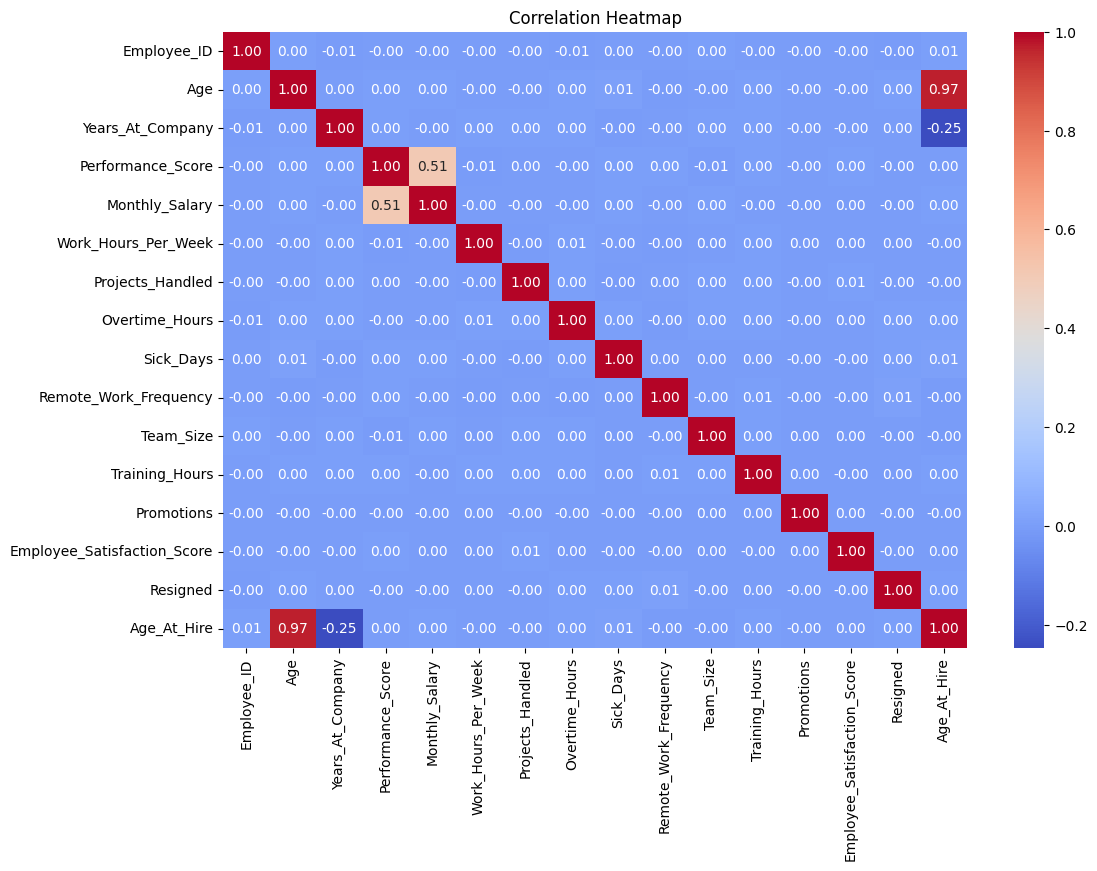

In [24]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
